## 1.2.1 Known Statistics---Computation for matrix inversion

In [1]:
import numpy as np
R_x = np.array([5,-1,-2,-1,5,-1,-2,-1,5]).reshape((3,3))
r_yx = np.array([1,5.3,-3.9])
print(f'R_x:\n{R_x}')
R_x_inverted = np.linalg.inv(R_x)
print(f'inverted R_x:\n {R_x_inverted}')
print(f'optimal w:\n {np.inner(r_yx,R_x_inverted)}')

R_x:
[[ 5 -1 -2]
 [-1  5 -1]
 [-2 -1  5]]
inverted R_x:
 [[0.26373626 0.07692308 0.12087912]
 [0.07692308 0.23076923 0.07692308]
 [0.12087912 0.07692308 0.26373626]]
optimal w:
 [ 0.2  1.  -0.5]


## 1.2.2 Steepest gradient descent

<AxesSubplot:xlabel='0', ylabel='1'>

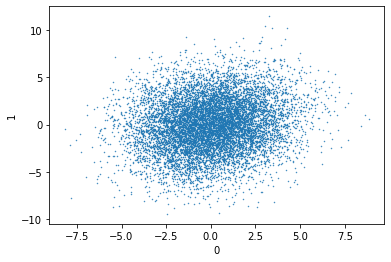

In [2]:
# Question f
import numpy as np
import pandas as pd

#import data x[k] in column 0, y[k] in column 1
data_f = pd.read_csv('assignment1_data.csv',header=None)
#check data
data_f.plot.scatter(x=0,y=1,s=0.2)

In [3]:
#initialize weights with 0
w_f = np.zeros((len(data_f),3))
alpha = 1e-2
R_x = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])
r_yx = np.array([1,5.3,-3.9])
flag=1
for n in range(1,len(data_f)):
    w_f[n] = w_f[n-1] + 2 * alpha * (r_yx - np.dot(R_x,w_f[n-1]))
    if np.sum(w_f[n]-w_f[n-1])==0 and flag:
        print(n)
        flag=0
print(w_f[n])

719
[ 0.2  1.  -0.5]


$J_{ls}=E(y^ty)+w^tR_xw-w^tr_{yx}-r_{yx}^tw$, choose $w_2$=-0.5    
$J_{ls} = E(y^ty)+5w_0^2+5w_1^2+5w_2^2-2w_0w_1-2w_1w_2-4w_0w_2-2w_0-10.6w_1+7.8w_2$

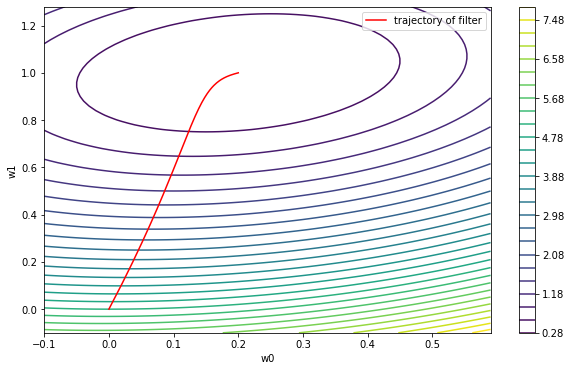

In [4]:
import matplotlib.pyplot as plt
W0,W1 = np.meshgrid(np.arange(-0.1,0.6,0.01),np.arange(-0.1,1.3,0.02))
y = data_f.iloc[:,1]

def error(w0,w1):
    return np.dot(y,y)/len(data_f)+5*(w0**2)+5*(w1**2)+5*((-0.5)**2)-2*w0*w1-9.6*w1 -7.8*0.5
    
J = error(W0,W1)
plt.figure(figsize=(10,6))
min_J,max_J = np.min(J),np.max(J)
plt.contour(W0,W1,J,np.arange(min_J,max_J,0.3))
plt.plot(w_f[:,0],w_f[:,1],color='red',label="trajectory of filter")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()
plt.savefig('1.2.2.png')
plt.show()

del J,W0,W1

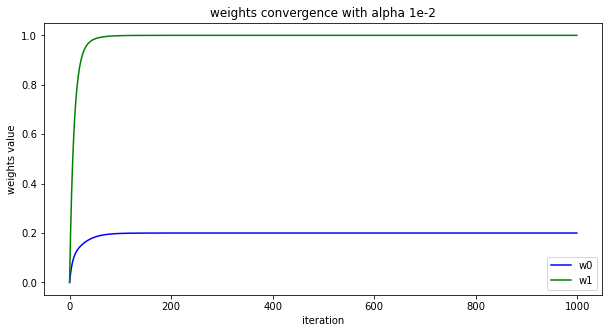

In [5]:
t = np.arange(0,1000,1)
plt.figure(figsize=(10,5))
plt.plot(t,w_f[:1000,0],color='blue',label='w0')
plt.plot(t,w_f[:1000,1],color='green',label='w1')
plt.xlabel('iteration')
plt.ylabel('weights value')
plt.title('weights convergence with alpha 1e-2')
plt.legend()
plt.show()

## 1.2.3 Newton's method

In [6]:
#initialize weights with 0
w_f_newton = np.zeros((len(data_f),3))
alpha = 1e-2
flag=1
for n in range(1,len(data_f)):
    w_f_newton[n] = (1-2*alpha)*w_f_newton[n-1] + 2 * alpha * np.dot(R_x_inverted,r_yx)
    if np.sum(w_f[n]-w_f[n-1])==0 and flag:
        print(n)
        flag=0
print(w_f_newton[n])

719
[ 0.2  1.  -0.5]


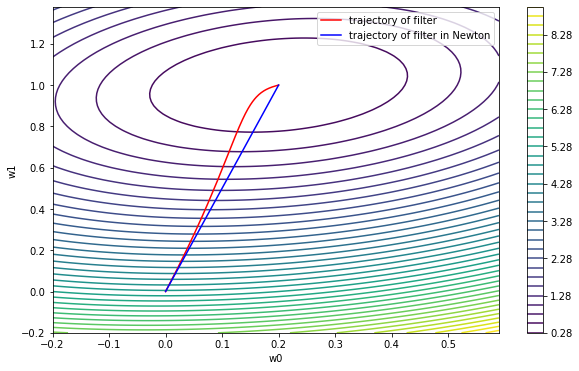

In [7]:
import matplotlib.pyplot as plt

W0,W1 = np.meshgrid(np.arange(-0.2,0.6,0.01),np.arange(-0.2,1.4,0.02))
J = error(W0,W1)

plt.figure(figsize=(10,6))
min_J,max_J = np.min(J),np.max(J)
plt.contour(W0,W1,J,np.arange(min_J,max_J,0.25))
plt.plot(w_f[:,0],w_f[:,1],color='red',label="trajectory of filter")
plt.plot(w_f_newton[:,0],w_f_newton[:,1],color='blue',label="trajectory of filter in Newton")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()
plt.savefig('1.2.3.png')
plt.show()

## 1.3.1 LMS and NLMS

In [13]:
x = data_f.iloc[:,0]
# filter weights initialization
w_f_LMS = np.zeros((len(data_f)-2,3))

alpha=1e-4

flag = 1
for n in range(1,len(data_f)-2): 
    X = np.array([x.iloc[n],x.iloc[n+1],x.iloc[n+2]])
    Y = y.iloc[n+2]
    e = Y - np.dot(w_f_LMS[n-1],X)
    w_f_LMS[n] = w_f_LMS[n-1] + 2* alpha * e * X
    if e<1e-8 and flag:
        print(n)
        flag = 0

print(w_f_LMS)

1
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.23479218e-05 -9.18023532e-06  2.59020688e-05]
 [-1.91205106e-05  1.36038142e-04  3.49029343e-04]
 ...
 [-5.08678214e-01  9.95607860e-01  2.08382574e-01]
 [-5.08731852e-01  9.95775045e-01  2.08197683e-01]
 [-5.08582437e-01  9.95609805e-01  2.08132002e-01]]


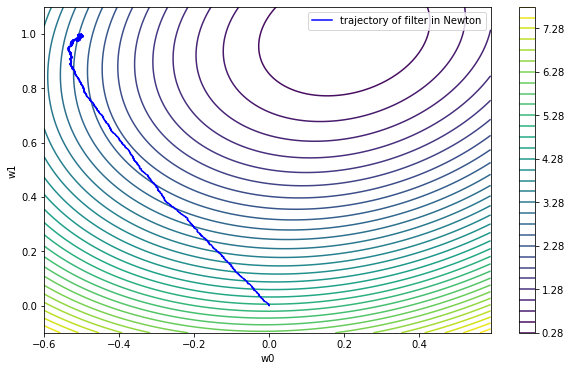

In [14]:
import matplotlib.pyplot as plt

W0,W1 = np.meshgrid(np.arange(-0.6,0.6,0.01),np.arange(-0.1,1.1,0.01))
J = error(W0,W1)

plt.figure(figsize=(10,6))
min_J,max_J = np.min(J),np.max(J)
plt.contour(W0,W1,J,np.arange(min_J,max_J,0.25))

plt.plot(w_f_LMS[:,0],w_f_LMS[:,1],color='blue',label="trajectory of filter in Newton")
plt.legend()
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()
plt.savefig('1.3.1.png')
plt.show()